In [16]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
# plt.style.use('seaborn-darkgrid')
# %matplotlib inline

In [3]:
futures_data = yf.download("PL=F", start="2022-01-01", end="2022-12-31")
futures_data.index = pd.to_datetime(futures_data.index)

C:\Users\e3plfmen\AppData\Local\Temp\1\ipykernel_37492\865895887.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  futures_data = yf.download("PL=F", start="2022-01-01", end="2022-12-31")
[*********************100%***********************]  1 of 1 completed


In [10]:
futures_data

Price,Close,High,Low,Open,Volume
Ticker,PL=F,PL=F,PL=F,PL=F,PL=F
Date,,,,,
2022-01-03,953.700012,978.200012,928.700012,978.200012,231
2022-01-04,970.400024,975.000000,950.900024,950.900024,58
2022-01-05,1001.900024,1001.900024,978.799988,980.000000,37
2022-01-06,960.599976,973.599976,960.500000,964.000000,7
2022-01-07,957.000000,970.200012,957.000000,970.200012,6
...,...,...,...,...,...
2022-12-23,1042.599976,1042.599976,1042.599976,1042.599976,0
2022-12-27,1042.699951,1042.699951,1042.699951,1042.699951,0


<Figure size 1500x700 with 0 Axes>

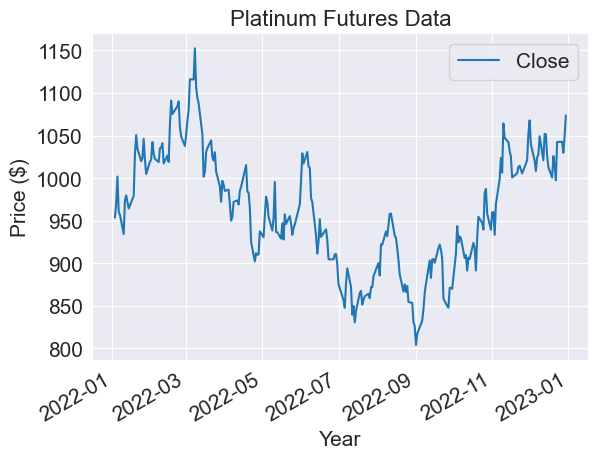

In [17]:
plt.figure(figsize=(15, 7))
futures_data['Close'].plot()
plt.title('Platinum Futures Data', fontsize=16)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Price ($)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)              
plt.legend(['Close'], prop={'size': 15})
plt.show()

In [18]:
futures_symbol = "ES=F"                
futures_data = yf.download(futures_symbol, start="2022-01-01", end="2022-04-01", interval="1d")

C:\Users\e3plfmen\AppData\Local\Temp\1\ipykernel_37492\570401700.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  futures_data = yf.download(futures_symbol, start="2022-01-01", end="2022-04-01", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [26]:
futures_data['Close']

Ticker,ES=F
Date,
2022-01-03,4786.00
2022-01-04,4784.25
2022-01-05,4692.50
2022-01-06,4687.50
2022-01-07,4667.75
...,...
2022-03-25,4536.50
2022-03-28,4568.00
2022-03-29,4625.50


In [32]:
import ta
# Calculate RSI                
futures_data["RSI"] = ta.momentum.RSIIndicator(futures_data["Close"]).rsi()
                
# Calculate Bollinger Bands
bbands = ta.volatility.BollingerBands(futures_data["Close"])
futures_data["BB_upper"] = bbands.bollinger_hband()
futures_data["BB_lower"] = bbands.bollinger_lband()
                
# Calculate MACD
macd = ta.trend.MACD(futures_data["Close"])
futures_data["MACD"] = macd.macd()
futures_data["MACD_signal"] = macd.macd_signal()

ValueError: Data must be 1-dimensional, got ndarray of shape (62, 1) instead